# Initial bad prediction

## Import needed bibs

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

## Exchange null values with mean

In [21]:
df = pd.read_csv('./../../../timeseries/merged/combined_timeseries.csv')

In [22]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])))
df_imputed.columns = df.select_dtypes(include=['float64', 'int64']).columns
df_imputed['Timestamp'] = df['Timestamp']  # Timestamp (oder andere nicht-numerische Spalten) hinzufügen, falls benötigt

# Feature Selection

In [23]:
X = df_imputed[['cpu_pod_frontend', 'cpu_system', 'slower_memory', 'network_outgoing_system']]
y = df_imputed['Durchschnittliche Antwortzeitintervalle']

In [24]:
X.head(5)

,cpu_pod_frontend,cpu_system,slower_memory,network_outgoing_system
0,0.000347,0.00181,1.216046e+10,7771.0
1,0.000347,0.00183,1.218717e+10,7746.0
2,0.000347,0.00185,1.243227e+10,7803.0
3,0.000347,0.00207,1.244914e+10,7984.0
4,0.001830,0.00235,1.249924e+10,7961.0


## Modell trainieren und auswählen

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [27]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 1732223.7033867508


In [28]:
comparison_df = pd.DataFrame({'Tatsächliche Werte': y_test, 'Vorhersagewerte': y_pred})
# Zurücksetzen des Index, um die Zeilennummerierung zu vereinfachen
comparison_df.reset_index(drop=True, inplace=True)

print(comparison_df)

# Optional: Berechnung und Ausgabe des Mean Squared Error zur Bewertung
print("MSE:", mean_squared_error(y_test, y_pred))

     Tatsächliche Werte  Vorhersagewerte
0            783.481481       236.864576
1            962.810219      1586.744594
2           1777.880952      1923.171880
3           1778.201439      1586.744594
4           1010.564103       783.894161
..                  ...              ...
606         1384.745763      1100.604162
607           37.600000       188.914473
608          816.000000       999.543966
609          212.720000       178.642103
610          176.750000       180.066338

[611 rows x 2 columns]
MSE: 1732223.7033867508


## Plot to show residuals

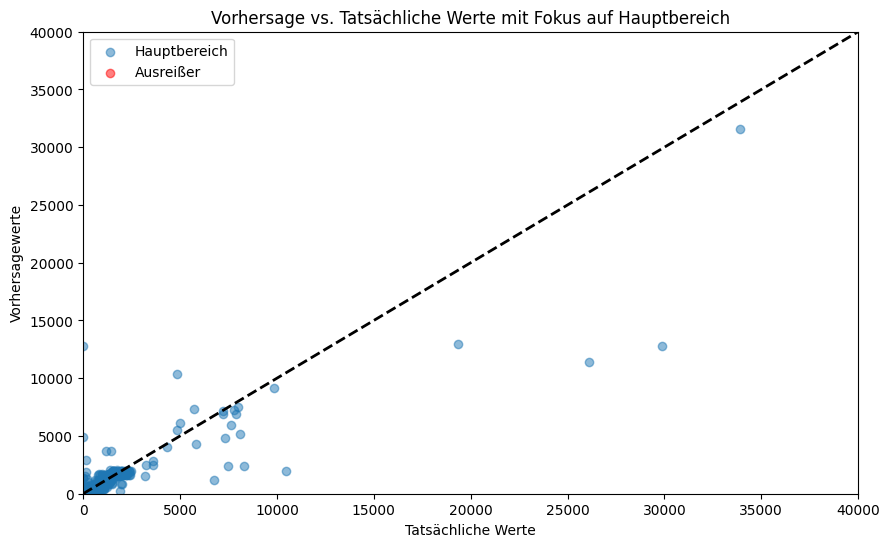

In [31]:
plt.figure(figsize=(10, 6))

# Definieren des Hauptbereichs für die Darstellung
hauptbereich_max = 40000

# Erstellen eines Scatter-Plots für Werte innerhalb des Hauptbereichs
im_hauptbereich = y_test <= hauptbereich_max
plt.scatter(y_test[im_hauptbereich], y_pred[im_hauptbereich], alpha=0.5, label='Hauptbereich')

# Optional: Hervorheben von Ausreißern mit anderer Farbe oder Marker
ausreisser = y_test > hauptbereich_max
plt.scatter(y_test[ausreisser], y_pred[ausreisser], color='red', alpha=0.5, label='Ausreißer')

# Anpassen der y-Achse des Plots, um den Fokus auf den Hauptbereich zu setzen
plt.ylim(0, hauptbereich_max)

# Anpassen der x-Achse, falls gewünscht
plt.xlim(0, hauptbereich_max)

plt.title('Vorhersage vs. Tatsächliche Werte mit Fokus auf Hauptbereich')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagewerte')
plt.plot([0, hauptbereich_max], [0, hauptbereich_max], 'k--', lw=2)  # Diagonale Linie im Hauptbereich
plt.legend()

# Optional: Ausreißer außerhalb des Plots hervorheben oder kennzeichnen
for i in y_test[ausreisser].index:
    plt.annotate(f'Ausreißer', (y_test[i], y_pred[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

## Show r2 Score

In [30]:
r2 = r2_score(y_test, y_pred)
print("R²-Score:", r2)

R²-Score: 0.8077287920130445
